In [7]:
import pandas as pd
import pickle
with open('tempresults3', 'rb') as f:
    resultdf = pickle.load(f)

In [8]:
import dtale
resultdf.fillna(0,inplace=True)

In [9]:
dtale.show(resultdf)

In [5]:
!pip install missingno

In [10]:
listnames = ['experimental_method','oligomeric_state1','oligomeric_state2','symmetry']
columns_track = []

for column in listnames:
    
    current_list = resultdf[column].tolist()
    element_number = {}
    numbered_list = []
    list_elements = []
    # On definit un chiffre et on incremente pour chaque nouvel element dans la liste
    for element in current_list:
        if element not in element_number:
            element_number[element] = len(element_number) + 1

        numbered_list.append(element_number[element])
        list_elements.append((element, element_number[element]))
    
    # Me permet de garder une trace sur quel element numerique correspond à quoi 
    columns_track.append(list(set(list_elements)))
    resultdf[column] = numbered_list
    
    #print(numbered_list)

print(columns_track)

[[('ELECTRON CRYSTALLOGRAPHY', 2), ('ELECTRON MICROSCOPY', 5), ('SOLUTION NMR', 4), ('X-RAY DIFFRACTION', 1), ('SOLID-STATE NMR', 3)], [('octameric', 1), ('helical', 17), ('dodecameric', 8), ('eicosameric', 19), ('pentameric', 6), ('36-meric', 16), ('nonameric', 11), ('monomeric', 13), ('octadecameric', 5), ('tetrameric', 2), ('hexadecameric', 7), ('hexameric', 9), ('decameric', 12), ('1824-meric', 18), ('27-meric', 10), ('dimeric', 4), ('32-meric', 21), ('270-meric', 20), ('trimeric', 3), ('tridecameric', 14), ('Dimeric', 15)], [('Hetero 9-mer', 19), ('Hetero 5-mer', 22), ('Homo 912-mer', 23), ('Homo 2-mer', 4), ('Homo 8-mer', 1), ('Homo 5-mer', 6), ('Homo 10-mer', 12), ('Hetero 6-mer', 21), ('Homo 20-mer', 26), ('Homo 1368-mer', 24), ('Homo 27-mer', 10), ('Hetero 4-mer', 15), ('Homo 12-mer', 8), ('Homo 16-mer', 7), ('Hetero 12-mer', 17), ('Hetero 270-mer', 28), ('Homo 6-mer', 9), ('Homo 1824-mer', 25), ('Homo 32-mer', 29), ('Monomer', 13), ('Hetero 8-mer', 27), ('Homo 3-mer', 3), ('H

In [11]:
extraction_variables = resultdf[listnames]

In [12]:
print(extraction_variables)

     experimental_method  oligomeric_state1  oligomeric_state2  symmetry
0                      1                  1                  1         1
1                      1                  2                  2         2
2                      1                  1                  1         2
3                      1                  2                  2         2
4                      1                  3                  3         2
..                   ...                ...                ...       ...
315                    2                 13                 13         1
316                    2                 13                 13         1
317                    2                 13                 13         1
318                    5                  8                  8         2
319                    1                 21                 29         2

[836 rows x 4 columns]


In [15]:
results_filtered = resultdf.drop(['DF_DSSP', 'DF_H', 'PDB_ID', 'AAseq'], axis=1)
results_filtered = results_filtered.drop(listnames,axis=1)

In [16]:
print(results_filtered)

     Number of H  H number w chains          SASA  Alignement_total  \
0      54.166667           0.067708   2261.384999         58.333333   
1      24.489796           0.034985   1134.354107         40.816327   
2      66.666667           0.066667   1451.159604         90.000000   
3      16.326531           0.023324   1042.378086         24.489796   
4      43.055556           0.011960    798.471920         50.000000   
..           ...                ...           ...               ...   
315    36.458333           0.011393   1123.378506         44.444444   
316    47.916667           0.014974    781.669362         54.166667   
317     0.520833           0.000163    789.418013          0.000000   
318    62.037037           0.051698  23714.585773         40.740741   
319     0.000000           0.000000  15522.940895          0.000000   

     Alignement_moyen  Hydrophobicity  Hydropathy  atom_count  H_atom_count  \
0           61.904762     1283.900542        35.2         408       

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
results_filtered.iloc[:,0:-1] = scaler.fit_transform(results_filtered.iloc[:,0:-1].to_numpy())

In [19]:
# Reintegration des variables qualitatives
results_filtered = pd.concat([results_filtered, extraction_variables], axis=1)

In [20]:
dtale.show(results_filtered)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(results_filtered.drop('is_amyloid', axis=1), results_filtered['is_amyloid'], test_size=0.2, random_state=42)

In [22]:
print(X_test.columns)

Index(['Number of H', 'H number w chains', 'SASA', 'Alignement_total',
       'Alignement_moyen', 'Hydrophobicity', 'Hydropathy', 'atom_count',
       'H_atom_count', 'E', 'T', 'S', 'G', 'H', 'I', 'B',
       'experimental_method', 'oligomeric_state1', 'oligomeric_state2',
       'symmetry'],
      dtype='object')


In [23]:
dtale.show(X_test)

In [24]:
import missingno as msno
import dtale

In [25]:
pickle.dump([columns_track,X_test.columns,listnames], open('columns.pickle', 'wb'))

In [47]:
dtale.show(resultdf)

In [48]:
dtale.show(results_filtered)

<AxesSubplot:>

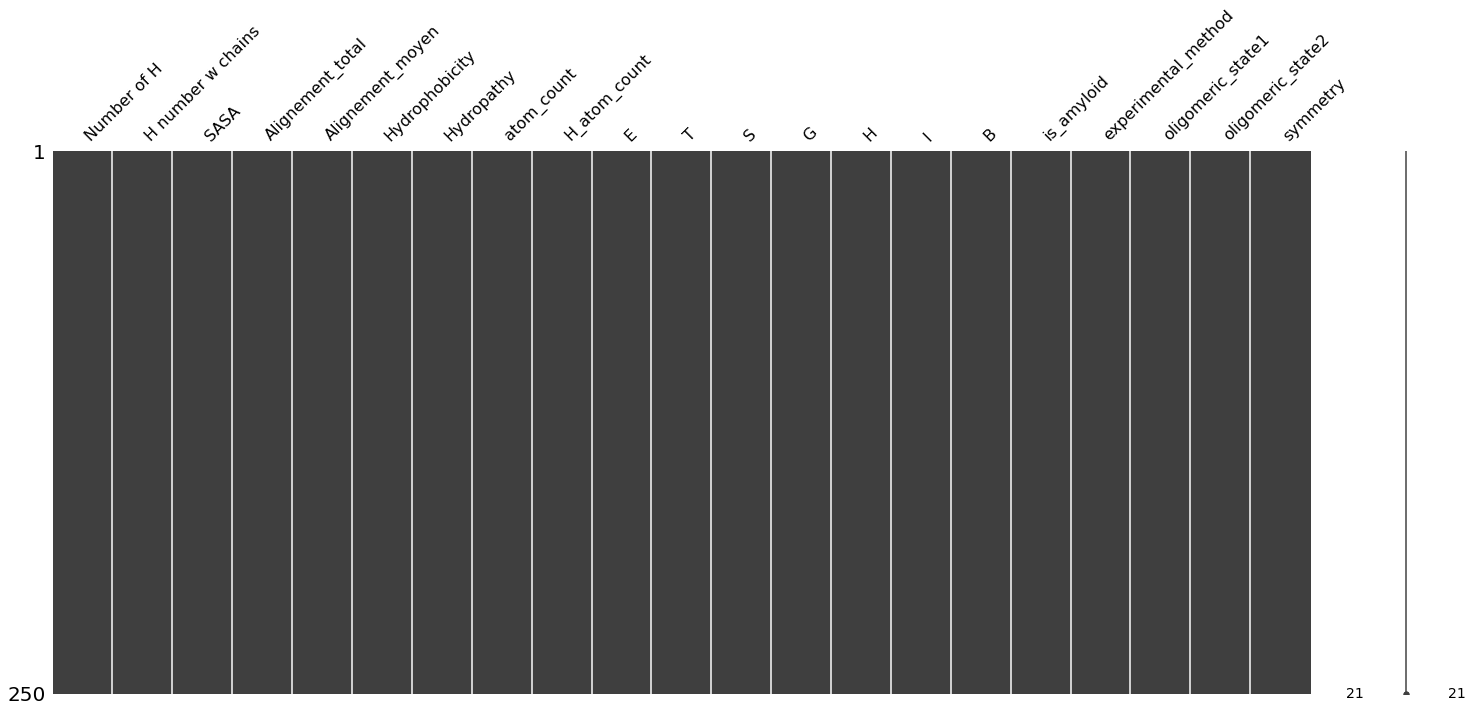

In [26]:
msno.matrix(results_filtered.sample(250))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the random forest classifier: {accuracy:.3f}')

Accuracy of the random forest classifier: 0.905


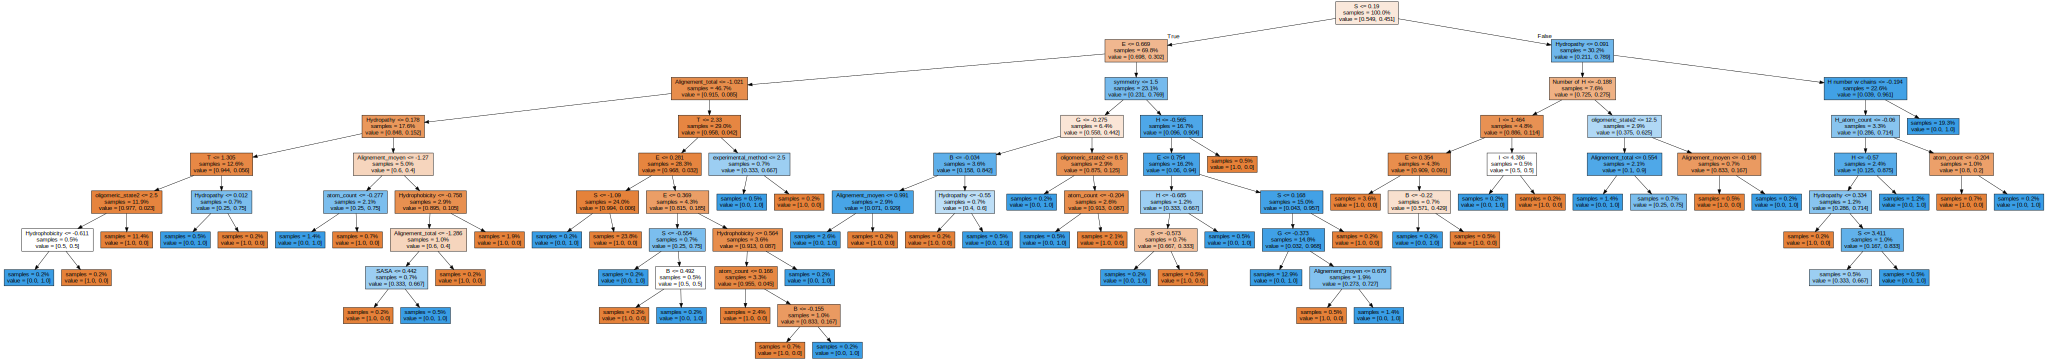

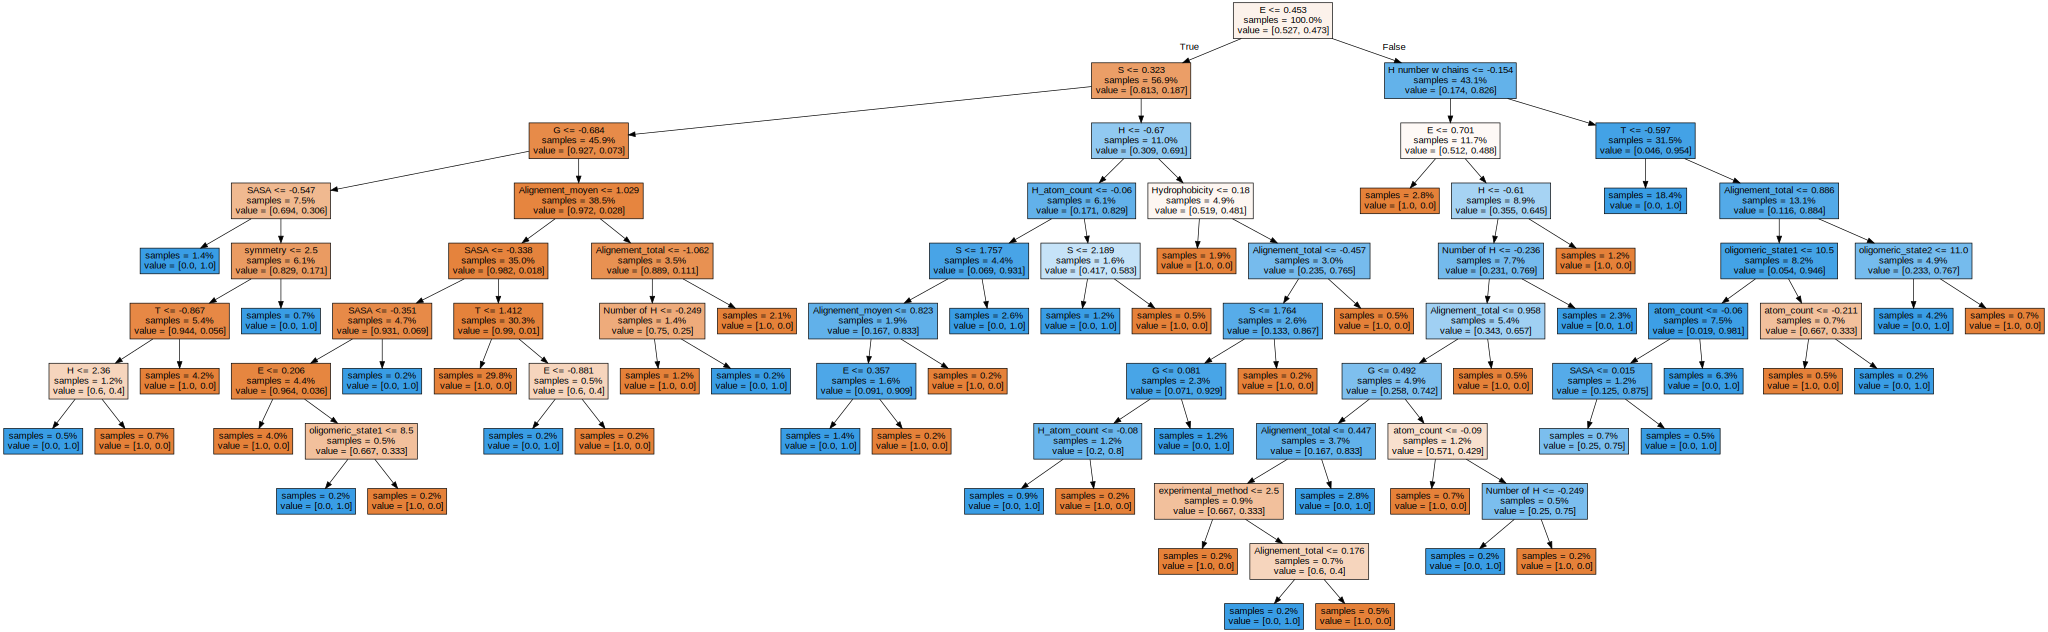

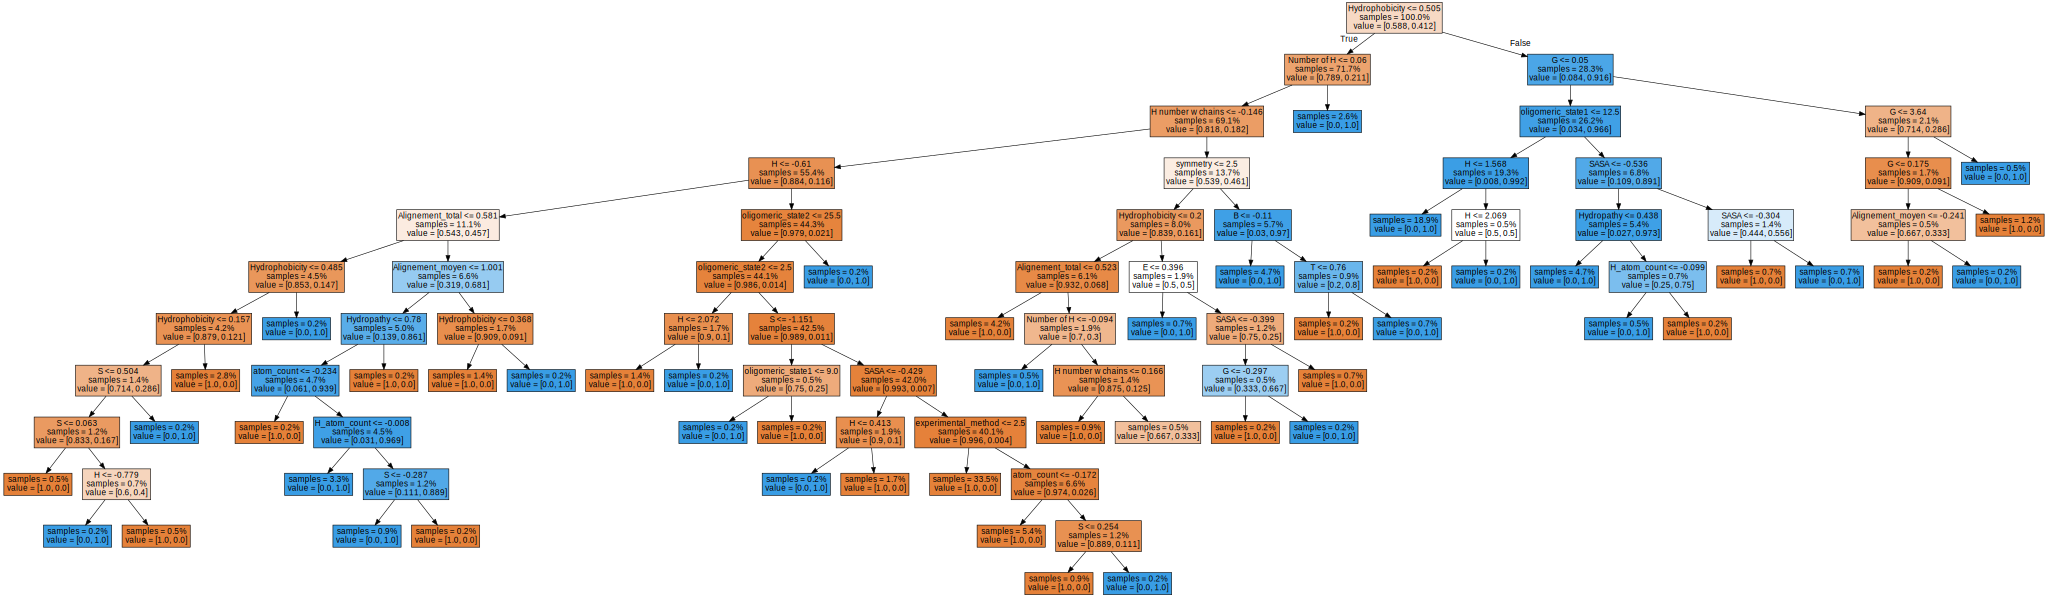

In [28]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data) 
    display(graph)
    graph.render(filename=f'tree_{i}', format='svg')

In [11]:
!pip install scikit-learn

In [12]:
with open('results.pickle', 'rb') as f:
    res = pickle.load(f)
    
print(res)

['7N8R', '2NAO', '2ONV', '4XFN', '4XFO', '8B3A', '3Q9J', '5TPT', '3Q9H', '3Q9I', '7ROL', '3Q9G', '2KIB', '7QV6', '6DIX', '6DIY', '6DJ0', '7QV5', '2LBU', '3FOD', '2OKZ', '2OL9', '2OLX', '6G8E', '8ADE', '3DGJ', '2OMP', '2ONA', '2ONW', '6G8C', '6G8D', '2ONX', '7QVC', '7QWG', '7QWL', '7QWM', '2RNM', '6G9G', '6MST', '2KJ3', '6GS3', '7K3Y', '6FHD', '7K3X', '3PPD', '6FHC', '6IC3', '6C3S', '6C3T', '3SGR', '6C3F', '6C4O', '6ZRF', '6ZRQ', '6ZRR', '6FG4', '6FGR', '2M5K', '2M5M', '6C88', '3SGM', '3SGN', '3SGO', '3SGP', '3SGS', '4OLR', '4ONK', '7SXN', '7ZKY', '6C3G', '6RHA', '6RHB', '6RHD', '3DG1', '3FR1', '7K3C', '3FVA', '2M5N', '3ZPK', '3FPO', '3FTR', '6HUD', '4R0P', '3FTH', '3FTK', '3FTL', '5I55', '2OMM', '5KNZ', '5KO0', '7ROJ', '3DVF', '3DVI', '6GQ5', '2MUS', '6GQ2', '6GQC', '6EEX', '6M7M', '5MGQ', '6M9I', '6M9J', '6CB9', '6CEW', '7M61', '7M62', '7M64', '7M65', '6Z1I', '2Q1E', '5W50', '5W52', '5W7V', '7YKW', '7YL0', '7YL3', '7YL7', '2Q20', '7LUZ', '3NVG', '3NVH', '7QIG', '3NVF', '3NVE', '7BX7',

2023-05-15 17:49:35,826 - INFO     - Executing shutdown due to inactivity...
2023-05-15 17:49:35,905 - INFO     - Executing shutdown...
2023-05-15 17:49:35,906 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/meuret/anaconda3/envs/louis/lib/python3.11/site-packages/flask/app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint

In [29]:
filename = 'first_model.sav'
pickle.dump(rf, open(filename, 'wb'))

2023-05-22 12:40:37,893 - INFO     - Executing shutdown due to inactivity...
2023-05-22 12:40:38,033 - INFO     - Executing shutdown...
2023-05-22 12:40:38,039 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/louis/miniconda3/lib/python3.9/site-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/home/louis/miniconda3/lib/python3.9/site-packages/dtale/app.py", line 433, in shutdown
    shutdown_server()
  File "/home/louis/miniconda3